<a href="https://colab.research.google.com/github/Benjamin-Ojo/poker-card-image-recognition/blob/main/2.Code/Poker_Card_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Card Image Classification**
---

## **Introduction**
---

Welcome to an exciting project where we will be exploring the fascinating world of image recognition! Our project focuses on the task of classifying a set of poker cards into 53 different categories based on their type.

Using a Convolutional Neural Network (CNN) model, we will train our model to accurately classify images of poker cards into any of the 53 categories. Our dataset, which was obtained from a popular data science community, Kaggle, contains a total of 8154 images of poker cards, divided into 7624 train, 265 test, and 265 validation sets. Each image is a 224 x 224 3-dimensional jpg format.

The dataset we used for this project can be found on the Kaggle website at the following link: [Cards Image Dataset-Classification](https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification). This project will not only teach us how to build a powerful image recognition model using a CNN model, but it will also give us a deeper understanding of the complexities involved in training a machine learning algorithm to recognize images. So, buckle up, and let's dive into this thrilling project together!

### Project Break Down: 
The project would be broken down in the following:

1. **Data Wrangling:** We will download the poker card image dataset from Kaggle and examine the images to gain insights into the data.

2. **Data Preprocessing:** We will preprocess the images by resizing them to a standard size and converting them into an array format suitable for feeding into our CNN model.

3. **Data Augmentation:** We will use data augmentation techniques such as image rotation, flipping, and zooming to increase the size of our dataset and improve the robustness of our model.

4. **Model Building:** We will build a CNN model using Keras with TensorFlow backend, and train the model using our preprocessed dataset. We will experiment with different architectures, hyperparameters, and optimization algorithms to achieve optimal performance.

5. **Model Evaluation:** We will evaluate the performance of our model using various metrics such as accuracy, precision, recall, and F1 score, and visualize the results using confusion matrix and classification report.

6. **Model Deployment:** We will deploy our trained model to make predictions on new, unseen poker card images, and visualize the predictions.



## **Project Packages.**
---


### Python Packages.


Python packages used in this project can be found below: 

In [ ]:
# Data Manipulation Packages.
import pandas as pd
import numpy as np

# File manager Packages. 
import os
from google.colab import files
from IPython.display import display

# Data Visualization Packages. 
import matplotlib.pyplot as plt

# Tensorflow Packages. 
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


## **Data Wrangling**
---

### Data Collection:

We will be downloading our dataset form kaggle and extracting the data from the zip foulder it enclosed in using zipfile package.

In [ ]:
# Define dataset folder. 
! mkdir 1.Dataset.

#### Kaggle Data Import

We will be downloading our dataset directly from kaggle to our colab notebook using the kaggle api. 

In [ ]:
# Install kaggle api with Pip. 
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Uploading Kaggle api token key.
from google.colab import files

files.upload()

In [ ]:
# Changing api token location.
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [ ]:
# set the appropriate permissions 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# verify api key.
!kaggle datasets list


ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          16076        438  1.0              
chitrakumari25/corona-virus-latest-data-2023              Corona virus latest data 2023                      10KB  2023-04-29 16:00:51           1632         41  1.0              
utkarshx27/starbucks-nutrition                            Starbucks Nutrition Facts                           2KB  2023-05-10 05:42:59           1064         36  1.0              
utkarshx27/monthly-transportation-statistics              Monthly Transportation Statistics         

In [ ]:
# Downloading dataset. 
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

 99% 383M/385M [00:16<00:00, 30.7MB/s]
100% 385M/385M [00:16<00:00, 24.2MB/s]


In [ ]:
# Unzip folder. 
! unzip cards-image-datasetclassification.zip -d 1.Dataset.

### Data Review.

We will be viewing our dataset and visulize them using matplotlib image show package. 

In [ ]:
# Defining data directories. 
data_dir = os.path.join("/content/1.Dataset.")

# Folder content.
os.listdir(data_dir)

['14card types-14-(200 X 200)-94.61.h5',
 'valid',
 'cards.csv',
 'train',
 '53cards-53-(200 X 200)-100.00.h5',
 'test']

In [ ]:
# Defining card path
card_path = os.path.join(data_dir, 'cards.csv')

# Read card.csv to padas.
cards_csv = pd.read_csv(card_path)

# Viewing data.
print(f"File shape: {cards_csv.shape}\n")
print(f"Data columns: {cards_csv.columns}\n")

File shape: (8155, 5)

Data columns: Index(['class index', 'filepaths', 'labels', 'card type', 'data set'], dtype='object')



In [ ]:
# Data layer-out
display(cards_csv.head(1))
print("\n\n")

# Training data sample
print(f"\t######################## Train Data Sample ########################\n")
train_sample = cards_csv[cards_csv['data set'] == 'train'].sample(n=10)
display(train_sample)
print("\n\n")

# Testing data sample
print(f"\t######################## Test Data Sample ########################\n")
test_sample = cards_csv[cards_csv['data set'] == 'test'].sample(n=10)
display(train_sample)
print("\n\n")

# Validation data
print(f"\t######################## Validation Data Sample ########################\n")
valid_sample = cards_csv[cards_csv['data set'] == 'valid'].sample(n=10)
display(valid_sample)
print("\n\n")


,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train





	######################## Train Data Sample ########################



,class index,filepaths,labels,card type,data set
2968,19,train/jack of spades/137.jpg,jack of spades,jack,train
6010,41,train/ten of clubs/072.jpg,ten of clubs,ten,train
7279,50,train/two of diamonds/098.jpg,two of diamonds,two,train
4263,29,train/queen of clubs/066.jpg,queen of clubs,queen,train
7021,48,train/three of spades/112.jpg,three of spades,three,train
5932,40,train/six of spades/152.jpg,six of spades,six,train
781,5,train/eight of diamonds/042.jpg,eight of diamonds,eight,train
3539,24,train/king of spades/033.jpg,king of spades,king,train
3082,20,train/joker/079.jpg,joker,xxx,train
402,2,train/ace of hearts/153.jpg,ace of hearts,ace,train





	######################## Test Data Sample ########################



,class index,filepaths,labels,card type,data set
2968,19,train/jack of spades/137.jpg,jack of spades,jack,train
6010,41,train/ten of clubs/072.jpg,ten of clubs,ten,train
7279,50,train/two of diamonds/098.jpg,two of diamonds,two,train
4263,29,train/queen of clubs/066.jpg,queen of clubs,queen,train
7021,48,train/three of spades/112.jpg,three of spades,three,train
5932,40,train/six of spades/152.jpg,six of spades,six,train
781,5,train/eight of diamonds/042.jpg,eight of diamonds,eight,train
3539,24,train/king of spades/033.jpg,king of spades,king,train
3082,20,train/joker/079.jpg,joker,xxx,train
402,2,train/ace of hearts/153.jpg,ace of hearts,ace,train





	######################## Validation Data Sample ########################



,class index,filepaths,labels,card type,data set
7941,10,valid/five of hearts/2.jpg,five of hearts,five,valid
7903,2,valid/ace of hearts/4.jpg,ace of hearts,ace,valid
7916,5,valid/eight of diamonds/2.jpg,eight of diamonds,eight,valid
7899,1,valid/ace of diamonds/5.jpg,ace of diamonds,ace,valid
8028,27,valid/nine of hearts/4.jpg,nine of hearts,nine,valid
7979,17,valid/jack of diamonds/5.jpg,jack of diamonds,jack,valid
7998,21,valid/king of clubs/4.jpg,king of clubs,king,valid
7949,11,valid/five of spades/5.jpg,five of spades,five,valid
8100,42,valid/ten of diamonds/1.jpg,ten of diamonds,ten,valid
8030,28,valid/nine of spades/1.jpg,nine of spades,nine,valid


In [ ]:
# Define the training, testing, and Validation directories. 
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

In [ ]:
train_sample.filepaths.to_list()

['train/jack of spades/137.jpg',
 'train/ten of clubs/072.jpg',
 'train/two of diamonds/098.jpg',
 'train/queen of clubs/066.jpg',
 'train/three of spades/112.jpg',
 'train/six of spades/152.jpg',
 'train/eight of diamonds/042.jpg',
 'train/king of spades/033.jpg',
 'train/joker/079.jpg',
 'train/ace of hearts/153.jpg']

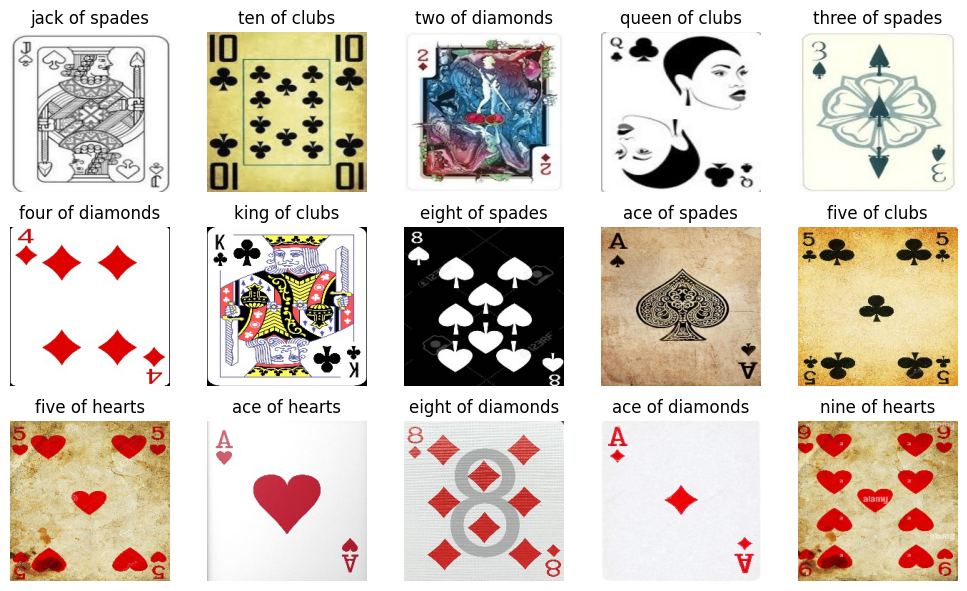

In [ ]:
# Visualizing Images. 

## Extracting file path. 
train_filepaths = train_sample.filepaths.to_list()[:5]
test_filepaths = test_sample.filepaths.to_list()[:5]
valid_filepaths = valid_sample.filepaths.to_list()[:5]

## Define full image path.
image_filepaths = train_filepaths + test_filepaths + valid_filepaths
image_files = [os.path.join(data_dir, file) for file in image_filepaths]

## Image rows and cols.
num_images = len(image_files)
num_rows = 3  # You can adjust the number of rows and columns as desired
num_cols = num_images // num_rows

## Define image shape.
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 6))

# Displaying images. 
for i, image_file in enumerate(image_files):
    row = i // num_cols
    col = i % num_cols
    image = plt.imread(image_file)
    axs[row, col].imshow(image)
    axs[row, col].set_title(image_file.split("/")[-2])
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


## **Data Preprocessing & Augmentation**
---

For the is phase of we would be cleaning our dataset by normalizing it,and some data augmentation to increase our training dataset.

In [60]:
# Extracting data label. 
labels = os.listdir(os.path.join(data_dir, 'train'))
labels = sorted(labels)
print(labels)

['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


In [ ]:
# Inititalizing training ImageDataGeneration. 
train_datagen = ImageDataGenerator(rescale = 1/224.0
                                  #  , rotation_range = 90
                                  #  , width_shift_range = 0.7
                                  #  , height_shift_range = 0.7
                                  #  , zoom_range = 0.5
                                  #  , horizontal_flip = True
                                  #  , vertical_flip = True
                                  #  , fill_mode= 'nearest'
                                   )

# Defining training data flow and labeling. 
train_gen = train_datagen.flow_from_directory(train_dir
                                              , target_size = (224, 224)
                                              , batch_size = 70
                                              , class_mode = 'categorical' )

# Initializing validation Image generator. 
valid_datagen = ImageDataGenerator(rescale = 1/224.0)

# Defining validation data flow & labeling. 
valid_gen = valid_datagen.flow_from_directory(valid_dir
                                              , target_size = (224, 224)
                                              , batch_size = 25
                                              , class_mode ='categorical')

# Initializing testing Image generator. 
test_datagen = ImageDataGenerator(rescale = 1/224.0)

# Defining testing data flow & labeling. 
test_gen = test_datagen.flow_from_directory(test_dir
                                            , target_size = (224, 224)
                                            , batch_size = 25
                                            , class_mode = 'categorical')

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [58]:
# # Checking if data augmentation is working. 

# ## Defining image data path.
# testing_aug = valid_sample.filepaths.to_list()[1]
# testing_aug = plt.imread(os.path.join(data_dir, testing_aug))
# testing_aug = np.expand_dims(testing_aug, axis = 0)

# ## Inputing image to image generator. 
# test_aug_gen = next(train_datagen.flow(testing_aug, batch_size = 8))

# ## Visualizing image. 
# fig, axes = plt.subplots(1, 8, figsize=(15, 3))
# titles = ['Original', 'Augmented 1', 'Augmented 2', 'Augmented 3', 'Augmented 4', 
#           'Augmented 5', 'Augmented 6', 'Augmented 7']

# for i, ax in enumerate(axes):
#     ax.imshow(test_aug_gen[i])
#     ax.set_title(titles[i])
#     ax.axis('off')

# plt.tight_layout()
# plt.show()


There seems to be a problem with our data augmentation, but in other not to let it hold us we will proceed with the existing dataset and come back when we are trying to optimize the model performance. 

## **Model Building**
---

### Hyperparameters.

The hyparaparameters used for training and other variables like batch size, image size, etc. will be defined below:

In [ ]:
# Tensorflow Hyper-parameters.
lr = 0.001
batch_size = 10
epoch_size = 10


### Model Structure & summary. 

In [56]:
# Model Architeture. 
model = Sequential([ # Defining Convolution layers. 
                    
                    ## First convolution layer. 
                    Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu')
                    , MaxPooling2D((3, 3))
                    ## Second convolutional layer.
                    , Conv2D(32, (3, 3), activation = 'relu')
                    , MaxPooling2D((3, 3))
                    ## Third convolutional layer.
                    , Conv2D(64, (3, 3), activation = 'relu')
                    , MaxPooling2D((3,3))
                    ## Fourth convolutional layer.
                    , Conv2D(128, (3, 3), activation = 'relu')

                    # Defining Dense neuroal network layers. 

                    ## Flattent input layer.
                    , Flatten()
                    ## Firest hidden layer.
                    , Dense(525, activation = 'relu')
                    ## Second hidden layer.
                    , Dense(250, activation = 'relu')
                    ## Output layer. 
                    , Dense(53, activation = 'softmax')
                    ])

  
# Model compile. 

## Training Optimizer 
adam_optimizer = Adam(learning_rate = lr)
rmsprop_optimizer = RMSprop(learning_rate = lr)

## Compile. 
model.compile(optimizer = rmsprop_optimizer 
              , loss = 'categorical_crossentropy'
              , metrics = ['accuracy'])

# Training model 
history = model.fit(train_gen
                    , epochs = epoch_size
                    , validation_data = valid_gen
                    , verbose = 1)

Epoch 1/10
109/109 [==============================] - 234s 2s/step - loss: 2.9912 - accuracy: 0.2152 - val_loss: 1.8739 - val_accuracy: 0.4151
Epoch 2/10
109/109 [==============================] - 221s 2s/step - loss: 1.9713 - accuracy: 0.4221 - val_loss: 1.4660 - val_accuracy: 0.5208
Epoch 3/10
109/109 [==============================] - 194s 2s/step - loss: 1.4762 - accuracy: 0.5742 - val_loss: 1.0877 - val_accuracy: 0.6717
Epoch 4/10
109/109 [==============================] - 198s 2s/step - loss: 1.1326 - accuracy: 0.6797 - val_loss: 0.8309 - val_accuracy: 0.7623
Epoch 5/10
109/109 [==============================] - 207s 2s/step - loss: 0.8492 - accuracy: 0.7579 - val_loss: 0.8007 - val_accuracy: 0.7849
Epoch 6/10
109/109 [==============================] - 191s 2s/step - loss: 0.6063 - accuracy: 0.8229 - val_loss: 0.9140 - val_accuracy: 0.7887
Epoch 7/10
109/109 [==============================] - 192s 2s/step - loss: 0.4138 - accuracy: 0.8801 - val_loss: 0.9433 - val_accuracy: 0.7887

,loss,accuracy,val_loss,val_accuracy
0,2.991207,0.215241,1.873921,0.415094
1,1.971255,0.422088,1.466045,0.520755
2,1.476188,0.574239,1.087674,0.671698
3,1.132597,0.679696,0.830927,0.762264
4,0.849214,0.757870,0.800680,0.784906
5,0.606281,0.822928,0.913967,0.788679
6,0.413767,0.880115,0.943283,0.788679
7,0.288880,0.923662,1.310924,0.766038
8,0.206680,0.946616,1.072820,0.803774
9,0.166504,0.957109,1.080799,0.837736


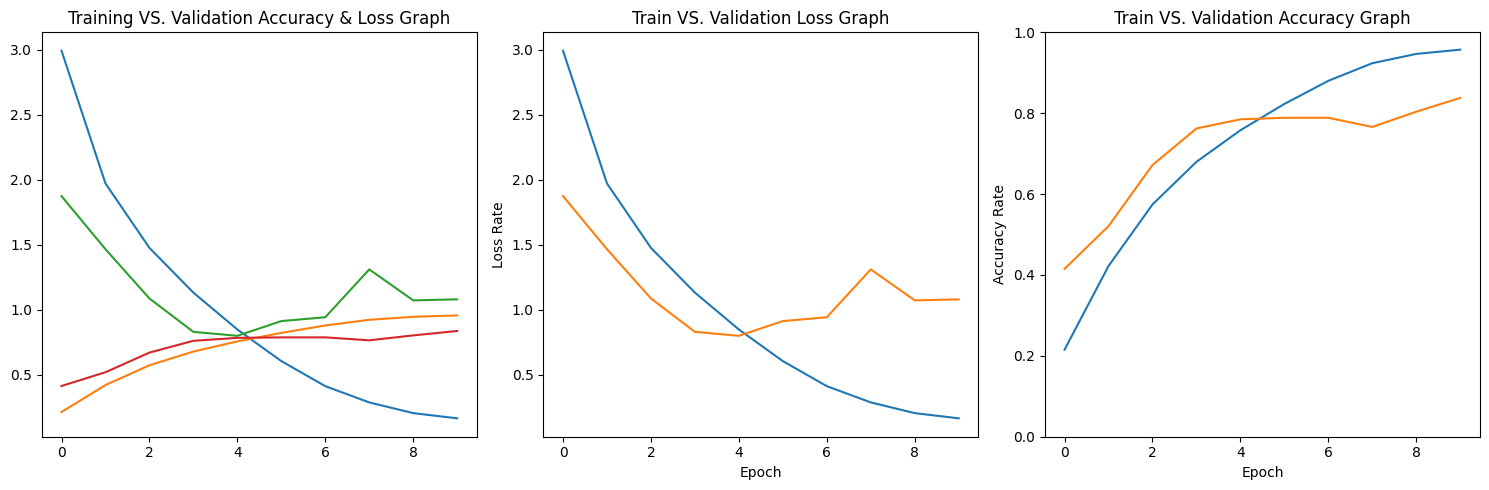

In [65]:
# Visualize model performance.

## Plot size and subplot.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

## Extracting training data.
history_df = pd.DataFrame(history.history)
display(history_df.head(20))
print('\n\n')

## Plotting model performance.
axes[0].plot(history_df)
axes[0].set_title('Training VS. Validation Accuracy & Loss Graph')
axes[0].grid(False)

## Plotting graph for train and validation loss.
loss_df = history_df[['loss', 'val_loss']]
axes[1].plot(loss_df)
axes[1].set_title('Train VS. Validation Loss Graph')
axes[1].set_ylabel('Loss Rate')
axes[1].set_xlabel('Epoch')
axes[1].grid(False)

## Plotting graph for train and validation accuracy.
accuracy_df = history_df[['accuracy', 'val_accuracy']]
axes[2].plot(accuracy_df)
axes[2].set_title('Train VS. Validation Accuracy Graph')
axes[2].set_ylabel('Accuracy Rate')
axes[2].set_xlabel('Epoch')
axes[2].set_ylim(0, 1)
axes[2].grid(False)

plt.tight_layout()
plt.show()


In [ ]:
# Saving model. 
model.save('/content/3.Model/model_1.h5')

In [72]:

# Download model to local file. 
files.download('/content/3.Model/model_1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model Evaluation & Prediction. 


Using the testing dataset we will be evaluating our model performance, making prediction with unseen images. 

In [52]:
# Evaluate model. 
model.evaluate(test_gen)

11/11 [==============================] - 5s 481ms/step - loss: 1.1980 - accuracy: 0.7887


[1.1979674100875854, 0.7886792421340942]

Saving download (3).jpg to download (3).jpg
1/1 [==============================] - 0s 34ms/step


 Model prediction ---> 11
 The card is a: five of spades




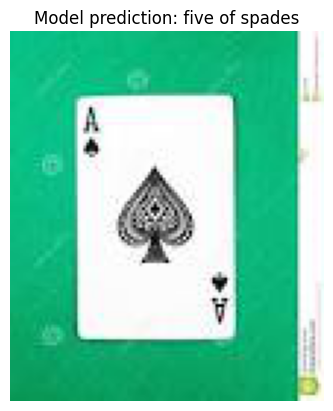

In [93]:
# Making prediction with unseen image. 

## Uploading images
upload = files.upload()

## Looping and preprocessing images. 
for filename in upload.keys():

    ### Loading and converting image to array.
    img_arr = load_img(filename, target_size = (224, 224))
    img_arr = img_to_array(img_arr)
    img_arr = img_arr/224.0

    ### Expanding array dimension and arragement.
    img_arr = np.expand_dims(img_arr, axis = 0)
    # img_arr = np.vstack([img_arr])

    ### Make prediction. 
    pred = model.predict(img_arr)
    pred_value = np.argmax(pred[0])
    card_name = labels[pred_value]
    print(f"\n\n Model prediction ---> {pred_value}")
    print(f" The card is a: {card_name}\n\n")
    
    # Visualizing image.
    title = 'Model prediction: ' + card_name
    img_show = plt.imread(filename)
    plt.imshow(img_show)
    plt.axis('off')
    plt.title(title)
    

1/1 [==============================] - 0s 29ms/step


 Model prediction ---> 4
 The card is a: eight of clubs




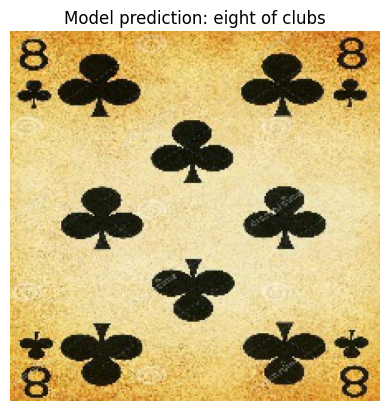

In [92]:
# Making prediction from testing dataset. 

## File path.
path = os.path.join('/content/1.Dataset./test/eight of clubs/5.jpg')

## Loading and converting image to array.
img = load_img(path, target_size = (224, 224))
img_arr = img_to_array(img)
img_arr = img_arr/224.0

## Expanding array dimension and arragement.
img_arr = np.expand_dims(img_arr, axis = 0)
img_arr = np.vstack([img_arr])

## Make prediction. 
pred = model.predict(img_arr)
pred_value = np.argmax(pred[0])
card_name = labels[pred_value]
print(f"\n\n Model prediction ---> {pred_value}")
print(f" The card is a: {card_name}\n\n")
    
# Visualizing image.
title = 'Model prediction: ' + card_name
img_show = plt.imread(path)
plt.imshow(img_show)
plt.axis('off')
plt.title(title);
    

## **Model Training with Transfer Learning.**
---


Using the inception transfer learning function and a pretrained model.

In [ ]:
# Creating and loading pretrained model. 

## Inta